# CNNs for Denoising using Autoencoders

Convolutional Neural Networks (CNNs) can be effectively employed for image denoising through an architecture known as a convolutional autoencoder. This type of neural network learns to transform noisy images into clean ones by compressing and then reconstructing the image data. The autoencoder consists of two main components: the encoder and the decoder.

The encoder compresses the input image into a lower-dimensional representation, capturing essential features while reducing noise. This compression process allows the network to focus on the most important aspects of the image, discarding the irrelevant noise. The decoder then reconstructs the denoised image from this compressed representation, aiming to restore the image to its original, noise-free state. The decoder effectively learns to upsample and refine the compressed data back into a clear and detailed image.

The training process involves feeding the autoencoder pairs of noisy and clean images. The network learns to minimize the difference between its output (the denoised image) and the clean image. This process typically involves creating a dataset of noisy and corresponding clean images. During training, the noisy images are used as input, and the clean images serve as targets. The autoencoder iteratively adjusts its parameters to reduce the error between its predictions and the actual clean images, learning to map noisy inputs to clean outputs.

Once trained, the autoencoder can take new noisy images and effectively denoise them, restoring them to their cleaner versions. This method leverages the power of CNNs to capture and preserve important features while removing noise, making it a robust solution for image denoising tasks. By transforming noisy images into clean ones, convolutional autoencoders offer a powerful tool for enhancing image quality in various applications.

---

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
def add_noise(img):
    noise = torch.randn(img.size()) * 0.3
    noisy_img = img + noise
    return noisy_img

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(add_noise)
])

# Load the MNIST training set with noise added
train_set = MNIST(root='./data', download=True, train=True, transform=transform)

# Normal transform for clean images
test_transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the MNIST test set without noise for validation
test_set = MNIST(root='./data', download=True, train=False, transform=test_transform)

# DataLoader
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:08<00:00, 1136413.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 57784.10it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1255868.85it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6539831.37it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Convolutional Neural Networks
### 1. **Convolution Operation**

The convolution operation is used in convolutional layers to extract features from input data such as images. The convolution involves sliding a smaller matrix (filter or kernel) over the input matrix (image) to produce a feature map.

Given an input image matrix $X$ and a filter matrix $K$, the convolution ($\ast$) operation is defined for each element $(i, j)$ of the output feature map $Y$ as:

$$
Y(i, j) = (K \ast X)(i, j) = \sum_m \sum_n K(m, n) \cdot X(i-m, j-n)
$$

- $m, n$ are the dimensions of the kernel.
- $i, j$ are the coordinates in the output feature map.

**Edge Handling**: Typically, the input is padded with zeros (zero-padding) to control the spatial size of the output feature map.

### 2. **Activation Functions**

After convolution, an activation function is applied element-wise to introduce non-linearities into the model, allowing it to learn more complex patterns. A common activation function is the Rectified Linear Unit (ReLU), defined as:

$$
\text{ReLU}(x) = \max(0, x)
$$

This function replaces negative values in the output of the convolution with zero while maintaining non-negative values as they are.

### 3. **Pooling Layers**

Pooling (or subsampling) reduces the spatial dimensions (width and height) of the input volume for the next convolutional layer. It helps reduce the computational cost and control overfitting by providing an abstracted form of the representation.

The most common form is max pooling, where the maximum element is selected from the region of the feature map covered by the filter, defined for a 2x2 pooling size as:

$$
Y(i, j) = \max_{\substack{a \in [i, i+1] \\ b \in [j, j+1]}} X(a, b)
$$

This operation reduces the dimensions of the input feature map by the size of the pooling region.

### 4. **Fully Connected Layers**

After several convolutional and pooling layers, the high-level reasoning in the neural network is done via fully connected layers. Neurons in a fully connected layer have connections to all activations in the previous layer. Their outputs are computed with a matrix multiplication followed by a bias offset:

$$
Y = WX + b
$$

- $W$ is the weight matrix,
- $X$ is the input vector to the fully connected layer,
- $b$ is the bias vector.

### Example in a Simple CNN:

Let’s assume a simple CNN architecture for clearer understanding:
1. **Input Layer**: Assume an input image of size 32x32x3 (width x height x channels).
2. **Convolutional Layer**: Use ten 5x5 filters without padding, stride = 1.
   - Output size: $(32 - 5 + 1) \times (32 - 5 + 1) \times 10 = 28 \times 28 \times 10$
3. **Activation Layer**: Apply ReLU.
4. **Pooling Layer**: Apply 2x2 max pooling with stride = 2.
   - Output size: $14 \times 14 \times 10$
5. **Fully Connected Layer**: Flatten the output and connect to a fully connected layer with 100 units.
   - Flatten size: $14 \times 14 \times 10 = 1960$
   - Output size: 100 (from the FC layer)

These operations transform raw input into a form suitable for classification or other high-accuracy tasks.


In [ ]:
class DenoiseCNN(nn.Module):
    def __init__(self):
        super(DenoiseCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # output: [16, 14, 14]
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),  # output: [32, 7, 7]
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)  # output: [64, 1, 1]
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # output: [1, 28, 28]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenoiseCNN().to(device)

# The Training Loop

The training loop iterates over batches of data provided by a DataLoader. Each batch of data is used to compute the loss and update the model's parameters.

Before the model can perform a backward pass, the existing gradients need to be zeroed out. This is because gradients in PyTorch accumulate by default, which is useful for certain types of models but not for standard training procedures.

## Forward Pass
In a neural network, the operation `output = model(data)` involves passing the input data through various layers of the network. Each layer computes a weighted sum of its inputs and applies an activation function. The forward pass through the network can be mathematically represented as follows for each layer $i$:

### Linear Combination
The input to each layer $i$, denoted as $x_i$ (where $x_0$ is the initial data), is transformed by a linear combination of weights $W_i$ and biases $b_i$. This is given by the equation:

$$
 z_i = W_i \cdot x_i + b_i
$$

Here, $z_i$ is the result of the linear combination at layer \(i\).
### Activation
The linear combination output $z_i$ is then passed through an activation function $f_i$, which introduces non-linearity into the model and helps to capture complex patterns in the data. The output of this activation function is:

$$
  x_{i+1} = f_i(z_i)
$$

   - $x_{i+1}$ becomes the input for the next layer $i+1$.

The process is repeated for each layer until the final output layer is reached. The output of the network, after processing through all layers, is:

$$
output = x_n = f_{n-1}(W_{n-1} \cdot x_{n-1} + b_{n-1})
$$

This represents the network's output based on the initial input data after passing through all the transformations and activations of the layers.


# Loss function

In the training of neural networks, especially in tasks like regression or autoencoders, measuring how well the model's predictions match the actual data is crucial. This is done using a loss function, which quantifies the difference between the predicted values and the actual values. In this case, we use the Mean Squared Error (MSE) loss, which is commonly used for these types of problems.

The MSE loss is calculated as follows:

- **Mean Squared Error Loss**:
  - The MSE loss measures the average squared difference between the predicted outputs and the actual outputs. It is given by the equation:
    $$
    \text{MSE} = \frac{1}{n} \sum_{i=1}^n (\text{output}_i - \text{data}_i)^2
    $$
  - Here, $\text{output}_i$ refers to the predicted output of the model for the $i$-th element, and $\text{data}_i$ refers to the actual value corresponding to the $i$-th element. The sum of squared differences is averaged over all $n$ elements in the dataset.

The code `loss = nn.MSELoss()(output, data)` calculates this loss using PyTorch's `nn.MSELoss`, which automatically handles the computation of the squared differences and the averaging:

- `nn.MSELoss()`: Creates an instance of the MSE loss function.
- `nn.MSELoss()(output, data)`: Computes the MSE loss between `output` and `data`.

This loss value is then used during the training process to update the model's weights with the goal of minimizing the loss, thereby improving the model's accuracy in predicting the data.


# Back Propagation

In training neural networks, the `loss.backward()` operation is pivotal as it initiates backpropagation, which is crucial for learning. This method calculates the gradients of the loss function with respect to the network's parameters, enabling their optimization during training.

### Mathematical Background of `loss.backward()`

- **Gradient Computation**:
  - Consider a neural network where the output depends on the input data through a series of transformations (layers). Let the loss function be denoted by $L$. For each parameter $\theta$ in the network (including weights and biases), the gradient of $L$ with respect to $\theta$ is represented as $\frac{\partial L}{\partial \theta}$.
  
  - The gradient $\frac{\partial L}{\partial \theta}$ indicates the direction and magnitude of change in $L$ when $\theta$ is altered slightly. Backpropagation computes these gradients using the chain rule of calculus, applying it layer by layer from the output back to the input.

- **Chain Rule Application**:
  - If the network output $y$ is a function of the weights $W$ (and biases $b$), and the loss $L$ depends on $y$, then by the chain rule, the gradient of $L$ with respect to each weight $w_{ij}$ in $W$ is:

    $$
    \frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial w_{ij}}
    $$
    
  - This process reverses through the network (hence 'backpropagation'), starting from the output layer and moving towards the input, updating the gradient at each layer based on the gradients computed in subsequent layers.

- **Efficiency of Backpropagation**:
  - This approach is efficient because it allows for the simultaneous updates of all gradients using a technique called reverse mode differentiation. This only requires a single pass from the output back to the input to compute all necessary gradients, minimizing computational overhead and improving training speed.

This methodical approach ensures that every parameter in the network is adjusted appropriately to minimize the loss, thus enhancing the model's predictive accuracy.


In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.MSELoss()(output, data)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(1, 6):
    train(model, device, train_loader, optimizer, epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.327067
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.159962
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.160823
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.154230
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.140378
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.118569
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.109507
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.103985
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.100498
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.098651
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.098425
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.099546
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.095994
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.098282
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.096209
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.095288
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.096000
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.094006
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.094433
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.094849
Train Epoch:

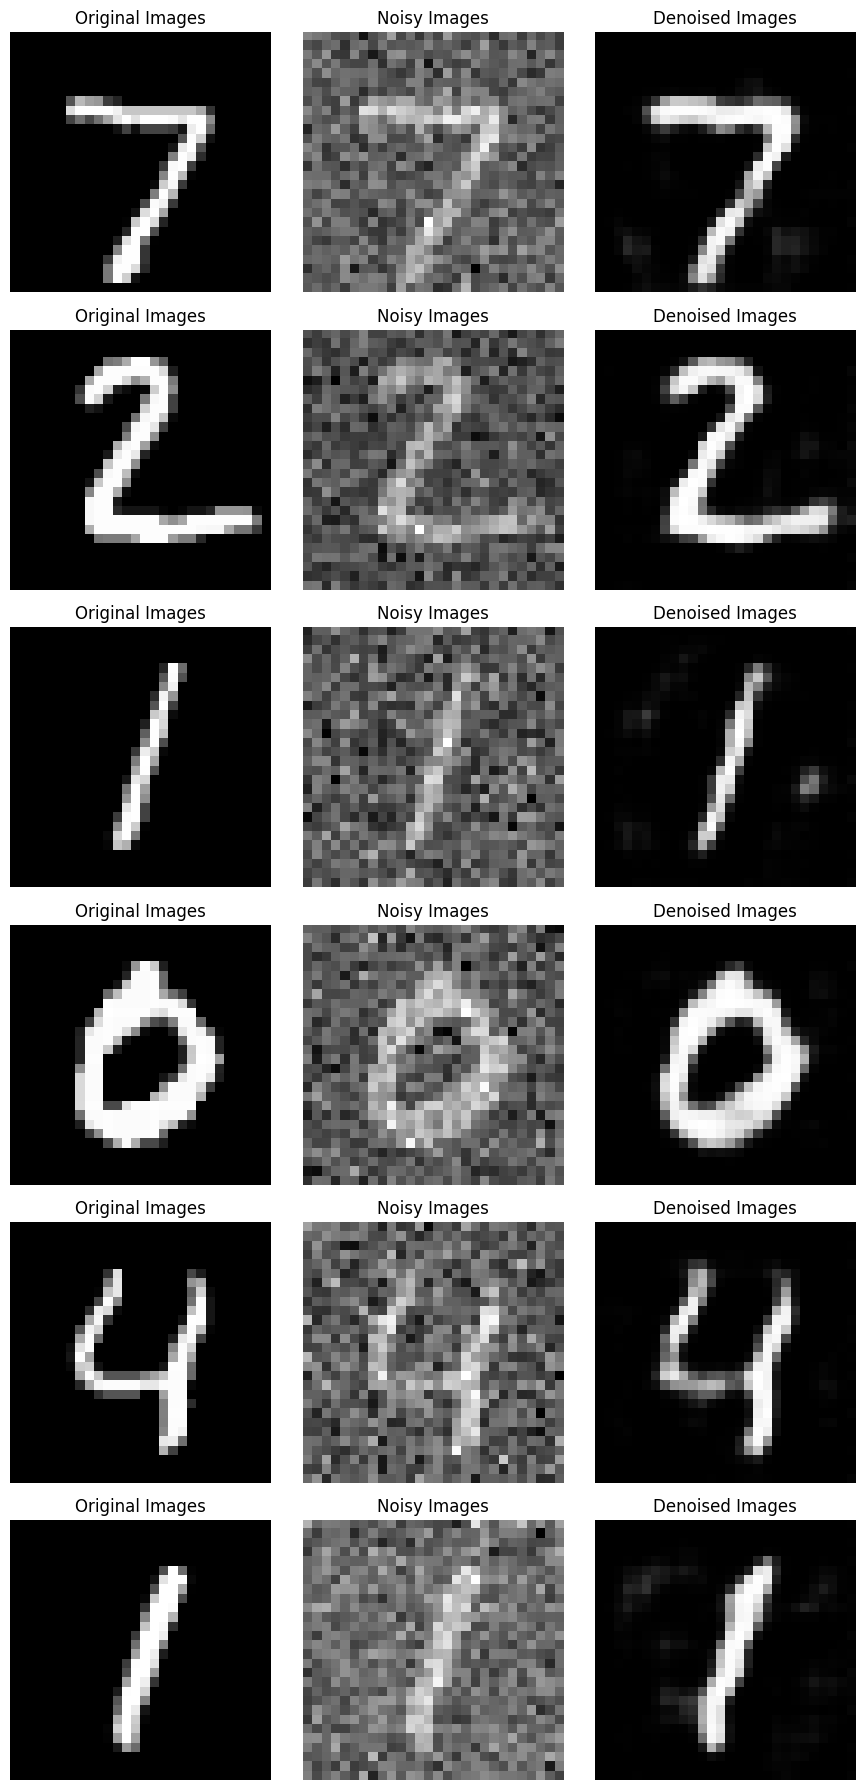

In [ ]:
def plot_examples(model, device, data_loader, num_images=6):
    model.eval()
    figure, ax = plt.subplots(nrows=num_images, ncols=3, figsize=(9, num_images * 3))
    with torch.no_grad():
        for batch_idx, (data, _) in enumerate(data_loader):
            noisy_data = add_noise(data)  # Add noise to the original data for visualization
            noisy_data = noisy_data.to(device)
            output = model(noisy_data)  # Denoise the noisy data
            for i in range(num_images):
                if batch_idx * data_loader.batch_size + i >= num_images:
                    break

                # Plot original image
                ax[i, 0].imshow(data[i].cpu().squeeze().numpy(), cmap='gray')
                ax[i, 0].title.set_text('Original Images')
                ax[i, 0].axis('off')

                # Plot noisy image
                ax[i, 1].imshow(noisy_data[i].cpu().squeeze().numpy(), cmap='gray')
                ax[i, 1].title.set_text('Noisy Images')
                ax[i, 1].axis('off')

                # Plot denoised image
                ax[i, 2].imshow(output[i].cpu().squeeze().numpy(), cmap='gray')
                ax[i, 2].title.set_text('Denoised Images')
                ax[i, 2].axis('off')

                if batch_idx * data_loader.batch_size + i + 1 == num_images:
                    break
            if batch_idx * data_loader.batch_size + i + 1 >= num_images:
                break

    plt.tight_layout()
    plt.show()

# Assuming model, device, and test_loader are already defined
plot_examples(model, device, test_loader)